# Dimensionality Reduction using PCA

Notebook recreated for download. Contains PCA theory, implementations (from-scratch and sklearn),
and demonstrations on synthetic datasets (2D anisotropic) and the digits dataset.


## Math recap

- Center data, compute covariance, solve eigenproblem or use SVD.
- Projection: Z = X_c V_k. Reconstruction: X_hat = Z V_k^T + mean.


In [ ]:
import numpy as np
from typing import Tuple

def center_data(X: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    mu = X.mean(axis=0)
    return X - mu, mu

def pca_svd(X: np.ndarray, k: int=None):
    Xc, mu = center_data(X)
    U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
    comps = Vt.T
    eigvals = (S**2) / (Xc.shape[0]-1)
    if k is not None:
        comps = comps[:, :k]
        eigvals = eigvals[:k]
    Z = Xc @ comps
    Xrec = Z @ comps.T + mu
    return comps, eigvals, Z, Xrec, mu


## Demo: synthetic 2D anisotropic data
Run the following cell to generate a scatter and principal component arrows.

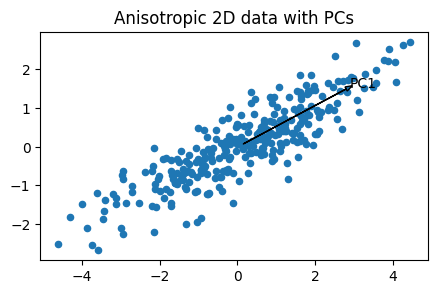

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
A = np.array([[3.0, 1.5],[1.5, 1.0]])
X = np.random.multivariate_normal(mean=[0,0], cov=A, size=300)
comps, eigvals, Z, Xrec, mu = pca_svd(X, k=2)
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], s=20)
ax.arrow(mu[0], mu[1], comps[0,0]*3, comps[1,0]*3, head_width=0.12)
ax.text(mu[0]+comps[0,0]*3.1, mu[1]+comps[1,0]*3.1, 'PC1')
ax.set_aspect('equal', 'box')
ax.set_title('Anisotropic 2D data with PCs')
plt.show()


## Demo: Digits dataset reconstruction
This cell computes PCA with sklearn and shows reconstruction for first few images.

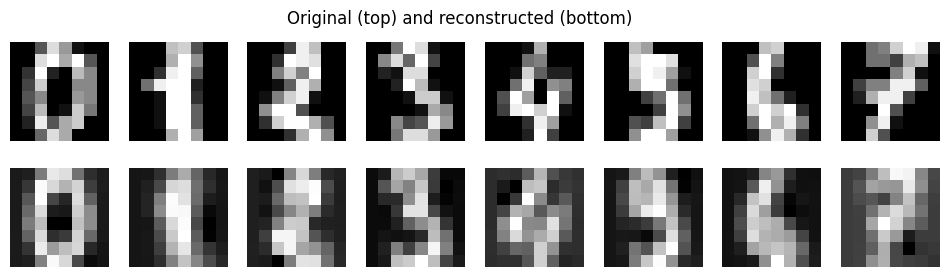

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA as skPCA
import matplotlib.pyplot as plt

digits = load_digits()
Xd = digits.data.astype(float)

pca = skPCA(n_components=10, random_state=0)
Z = pca.fit_transform(Xd)
Xrec = pca.inverse_transform(Z)

fig, axes = plt.subplots(2,8, figsize=(12,3))
for i in range(8):
    axes[0,i].imshow(Xd[i].reshape(8,8), cmap='gray'); axes[0,i].axis('off')
    axes[1,i].imshow(Xrec[i].reshape(8,8), cmap='gray'); axes[1,i].axis('off')
plt.suptitle('Original (top) and reconstructed (bottom)')
plt.show()
